# **Extra-credit: in-class assignment**

Students' names:<br>
Tharun Theerupally<br>
Sai Greeshmanth Chigurupati<br>
(GitHub (Tharun Theerupally): https://github.com/tharunrede/INF502/blob/main/ExtraHW.ipynb )<br>
(GitHub (Sai Greeshmanth Chigurupati): https://github.com/SaiGreeshmanth/INF-502/blob/main/extrahw.ipynb )

In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup


In [2]:
result = requests.get("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density")  
content = result.content
soup = BeautifulSoup(content, 'html.parser')

In [3]:
tables = soup.find_all('table')
table = tables[0]
df = pd.DataFrame(columns=['Country_Name', 'Area_sqkm', 'Area_sqmi', 'Population'])


In [4]:

for row in table.tbody.find_all('tr'):    
    columns = row.find_all('td')
    Country_Name = row.find_all('th')

    if(columns != []):
        Country_Name = Country_Name[0].text.strip()
        Area_sqkm = float((columns[1].text.strip()).replace(',', ''))
        Area_sqmi = float((columns[2].text.strip()).replace(',', ''))
        population = float((columns[0].text.strip()).replace(',', ''))
        df = df.append({'Country_Name': Country_Name,  'Area_sqkm': Area_sqkm, 'Area_sqmi': Area_sqmi, 'Population': population}, ignore_index=True)

In [5]:
df = df.set_index("Country_Name")
#df.head()

In [6]:
df = df.drop(["World (excluding Antarctica)", "World (all land)"])

In [7]:
print(df.describe(include=[np.number]))
#df.sort_values(by=['Population'])


          Area_sqkm     Area_sqmi    Population
count  2.480000e+02  2.480000e+02  2.480000e+02
mean   5.456364e+05  2.106702e+05  3.189263e+07
std    1.700353e+06  6.565065e+05  1.325428e+08
min    0.000000e+00  0.000000e+00  4.700000e+01
25%    1.533250e+03  5.920000e+02  3.130185e+05
50%    6.493100e+04  2.506950e+04  5.058126e+06
75%    3.623352e+05  1.398980e+05  1.959232e+07
max    1.709825e+07  6.601633e+06  1.425893e+09


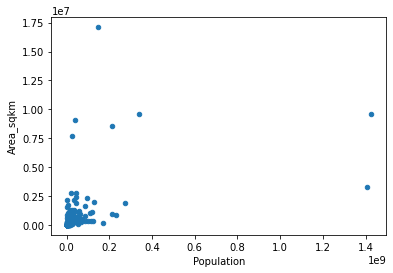

In [8]:
df.plot.scatter(x = "Population", y = "Area_sqkm")